In [1]:
import json
import re

In [2]:
autos = json.load(open("data_files/autos.json", "r"))

In [3]:
pri = re.compile(r"""[.]* Q.(\d*,\d*.\d{2})""")
num = re.compile(r"""(\d+)""")

In [4]:
pricel = list(map(lambda x: int("".join(num.findall(pri.findall(x["price_string"])[0])[:2:])), autos))

In [5]:
yearl = list(map(lambda x: int(x["year"]), autos))

In [6]:
len(autos)

800

In [7]:
%matplotlib notebook


In [8]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

<IPython.core.display.Javascript object>


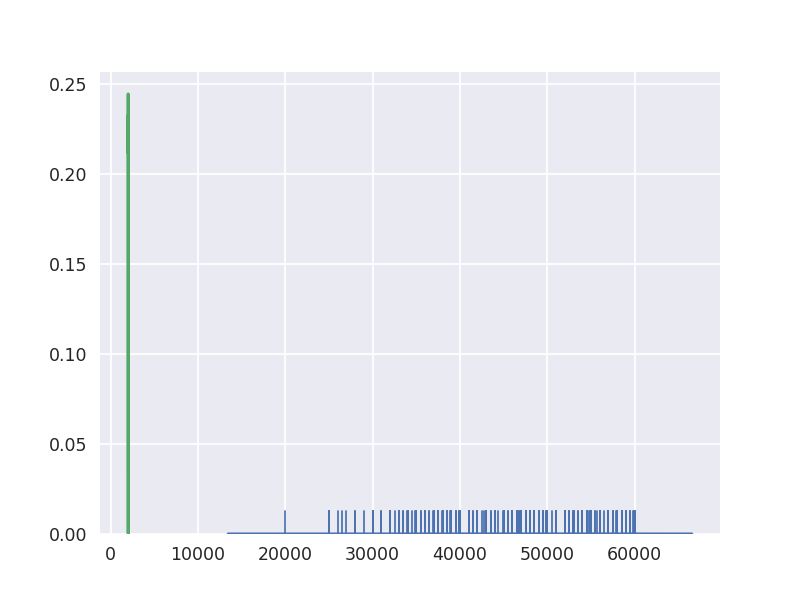

In [9]:
sns.distplot(pricel, rug=True)

In [10]:
sns.distplot(yearl)

In [11]:
dataframed_price_year = pd.DataFrame(list(zip(pricel, yearl)), columns=["price", "year"])

<IPython.core.display.Javascript object>


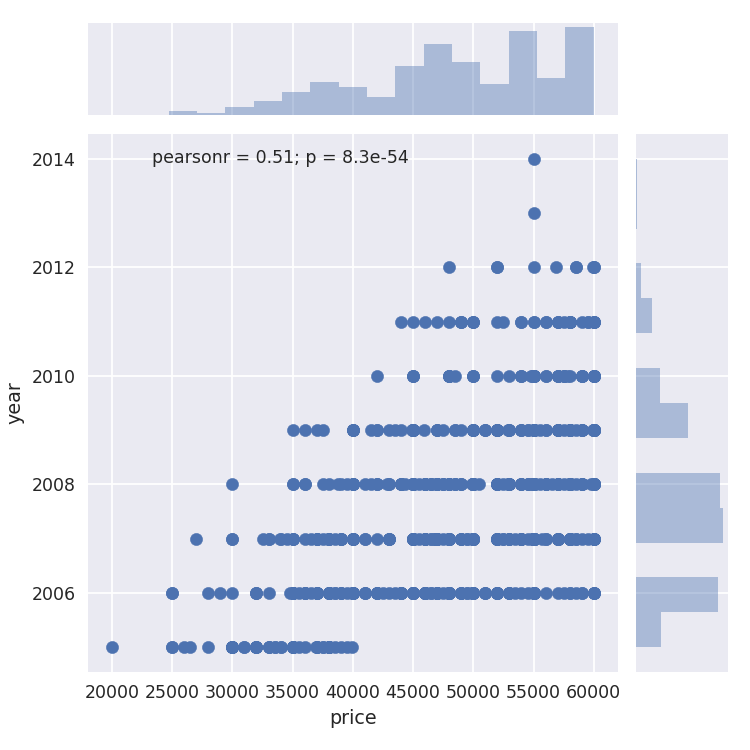

In [12]:
sns.jointplot(x="price", y="year", data=dataframed_price_year)

<IPython.core.display.Javascript object>


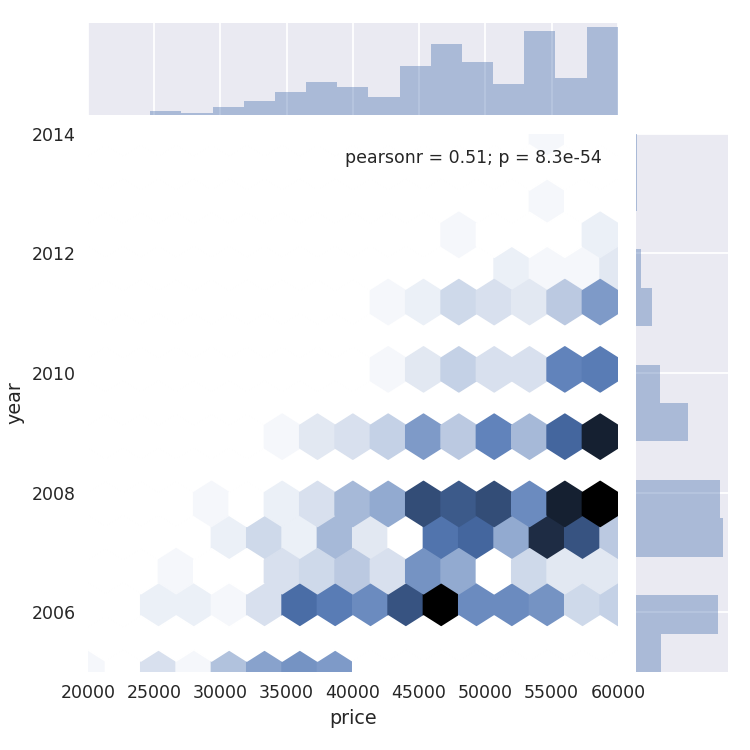

In [13]:
sns.jointplot(x="price", y="year", kind="hex", data=dataframed_price_year)

<IPython.core.display.Javascript object>


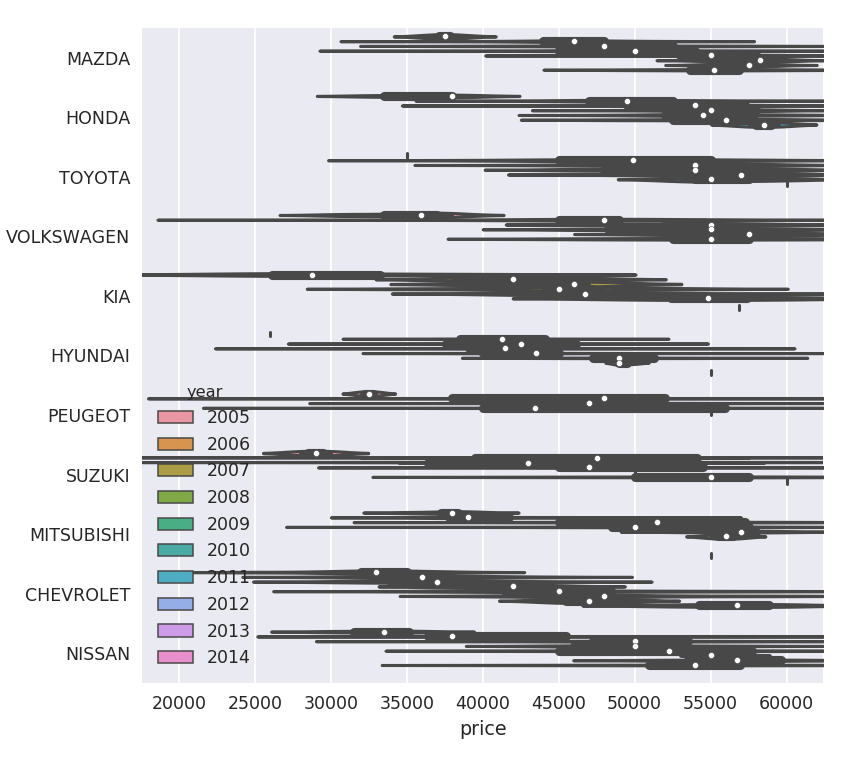

In [14]:
sns.lmplot(x="price", y="year", data=dataframed_price_year, order=4)

In [15]:
def clean_fix_autos(auto_item):
    pri = re.compile(r"""[.]* Q.(\d*,\d*.\d{2})""")
    num = re.compile(r"""(\d+)""")
    price = int("".join(num.findall(pri.findall(auto_item["price_string"])[0])[:2:]))
    del(auto_item["price_string"])
    auto_item["price"] = price
    auto_item["year"] = int(auto_item["year"])
    ccs = auto_item.get("ccs")
    if ccs is not None:
        # print(ccs)
        cc = num.findall(ccs)[0]
        auto_item["cc"] = int(cc)
    del(auto_item["ccs"])
    try:
        distance_s, units = auto_item["kms"].split()
        distance = int(distance_s)
        if units == "MILLAS":
            distance = distance * 1.6
        elif units == "KM":
            distance = distance
        auto_item["odo"] = distance
    except Exception as e:
        pass
    return auto_item    

In [16]:
pd_autos = pd.DataFrame(list(map(clean_fix_autos, autos)))

In [17]:
pd_autos["model"].value_counts()

3                108
YARIS             86
CIVIC             80
LANCER            48
COROLLA           38
AVEO              37
ACCENT            33
VERSA             25
JETTA             22
SENTRA            20
206               20
OPTRA             18
RIO               18
6                 17
FIT               16
CIVIC EX          10
2                  9
SPARK              9
ALMERA             9
GOLF               8
S-40               8
PICANTO            8
307                7
TIIDA              7
CIVIC LX           7
SWIFT              7
RABBIT             6
ELANTRA            6
SCION XA           6
SCION TC           5
                ... 
GLI                1
EON                1
SX 4               1
CIVIC HIBRIDO      1
ALTO               1
A4                 1
STILO              1
VUE                1
RABBIT GTI         1
FABIA              1
IBIZA              1
OPIRUS             1
TIBURON            1
SCION XB           1
COOPER             1
AERIO              1
MIRAGE       

In [18]:
pd_autos

,brand,cc,color,contact_string,gp_id,kms,model,odo,price,year
0,MAZDA,2000.0,GRIS,\n,<h1>Detalle del vehículo 54974</h1>,45589 MILLAS,3,72942.4,54000,2010
1,HONDA,1800.0,GRIS,\n,<h1>Detalle del vehículo 50527</h1>,51934 MILLAS,CIVIC,83094.4,54000,2010
2,TOYOTA,1500.0,NEGRO,\n,<h1>Detalle del vehículo 53752</h1>,60000 MILLAS,YARIS,96000.0,53000,2010
3,HONDA,1800.0,NEGRO,\n,<h1>Detalle del vehículo 54314</h1>,76000 MILLAS,CIVIC,121600.0,52000,2010
4,VOLKSWAGEN,1600.0,ROJO,\n,<h1>Detalle del vehículo 55441</h1>,117000 KM,FOX,117000.0,50000,2010
5,KIA,1600.0,GRIS,\n,<h1>Detalle del vehículo 42159</h1>,57000 MILLAS,RIO,91200.0,50000,2010
6,HYUNDAI,1600.0,GRIS,\n,<h1>Detalle del vehículo 54891</h1>,103800 MILLAS,ACCENT,166080.0,41000,2008
7,HYUNDAI,1600.0,GRIS,\n,<h1>Detalle del vehículo 48744</h1>,102432 MILLAS,ACCENT,163891.2,50000,2010
8,MAZDA,2000.0,VERDE CLARO POLICROMADO,\n,<h1>Detalle del vehículo 54631</h1>,None,3,NaN,40000,2008
9,RENAULT,1600.0,VERDE ALMENDRA,\n,<h1>Detalle del vehículo 54909</h1>,110000 KM,CLIO,110000.0,40000,2008


<IPython.core.display.Javascript object>


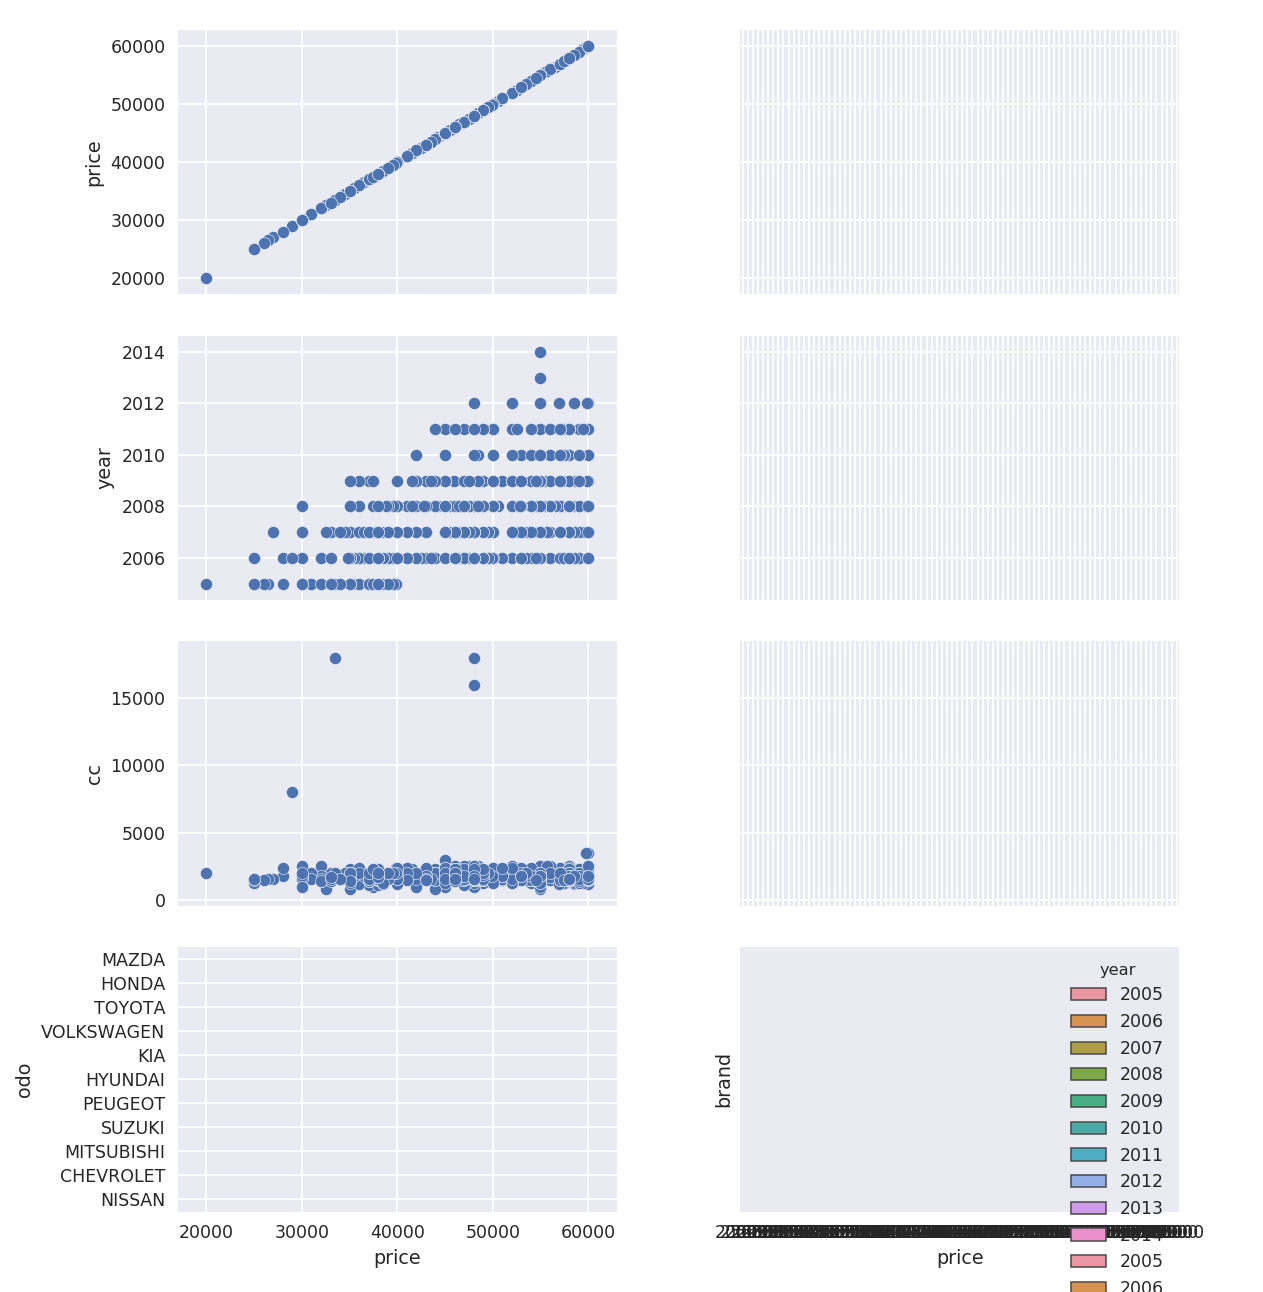

In [19]:
sns.pairplot(pd_autos, x_vars=["price", "year"], y_vars=["price", "year", "cc", "odo"], dropna=True);

In [20]:
sns.stripplot(x="price", y="cc", hue="year", data=pd_autos, size=4)

In [21]:
sns.violinplot(x="price", y="brand", data=pd_autos);

In [22]:
pd_autos

,brand,cc,color,contact_string,gp_id,kms,model,odo,price,year
0,MAZDA,2000.0,GRIS,\n,<h1>Detalle del vehículo 54974</h1>,45589 MILLAS,3,72942.4,54000,2010
1,HONDA,1800.0,GRIS,\n,<h1>Detalle del vehículo 50527</h1>,51934 MILLAS,CIVIC,83094.4,54000,2010
2,TOYOTA,1500.0,NEGRO,\n,<h1>Detalle del vehículo 53752</h1>,60000 MILLAS,YARIS,96000.0,53000,2010
3,HONDA,1800.0,NEGRO,\n,<h1>Detalle del vehículo 54314</h1>,76000 MILLAS,CIVIC,121600.0,52000,2010
4,VOLKSWAGEN,1600.0,ROJO,\n,<h1>Detalle del vehículo 55441</h1>,117000 KM,FOX,117000.0,50000,2010
5,KIA,1600.0,GRIS,\n,<h1>Detalle del vehículo 42159</h1>,57000 MILLAS,RIO,91200.0,50000,2010
6,HYUNDAI,1600.0,GRIS,\n,<h1>Detalle del vehículo 54891</h1>,103800 MILLAS,ACCENT,166080.0,41000,2008
7,HYUNDAI,1600.0,GRIS,\n,<h1>Detalle del vehículo 48744</h1>,102432 MILLAS,ACCENT,163891.2,50000,2010
8,MAZDA,2000.0,VERDE CLARO POLICROMADO,\n,<h1>Detalle del vehículo 54631</h1>,None,3,NaN,40000,2008
9,RENAULT,1600.0,VERDE ALMENDRA,\n,<h1>Detalle del vehículo 54909</h1>,110000 KM,CLIO,110000.0,40000,2008


In [23]:
brand = pd_autos["brand"]

In [24]:
top_brands = brand.value_counts()[:20:]

In [25]:
filtered_pd_autos = pd_autos.copy()

In [26]:
filtered_pd_autos = pd_autos.groupby("brand").filter(lambda x: len(x) > 20)

<IPython.core.display.Javascript object>


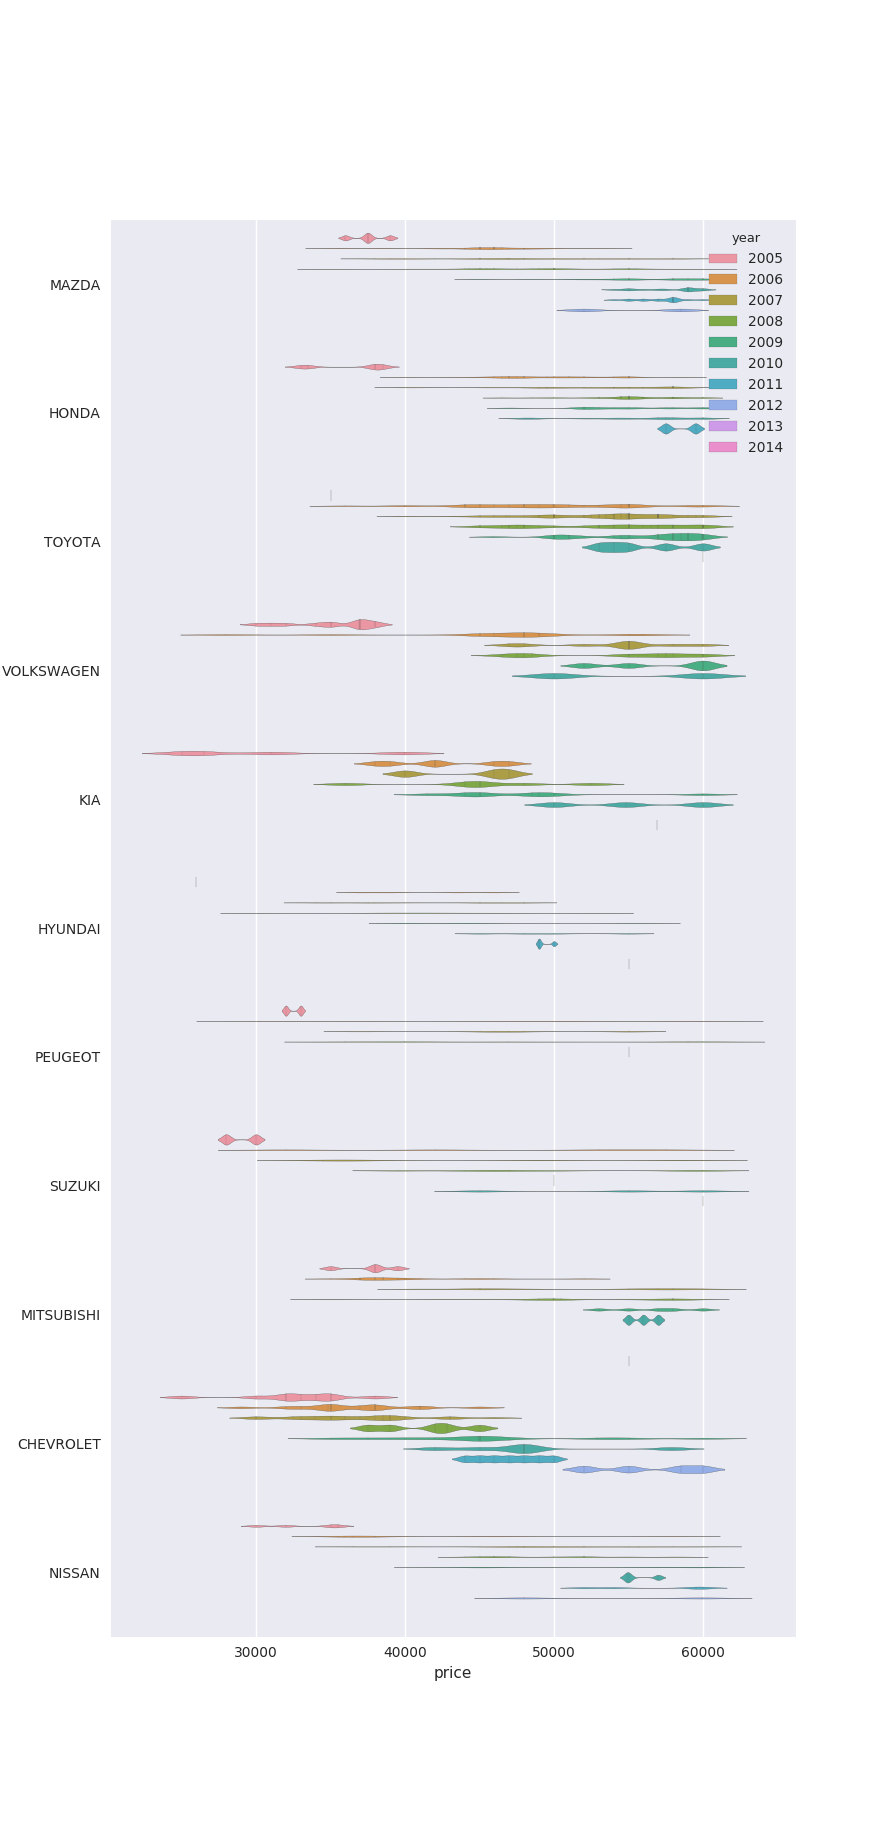

In [38]:
sns.violinplot(x="price", y="brand", hue ="year", height=20, bw=.2, inner="stick", linewidth=0.2, orient='h', data=filtered_pd_autos)

<IPython.core.display.Javascript object>


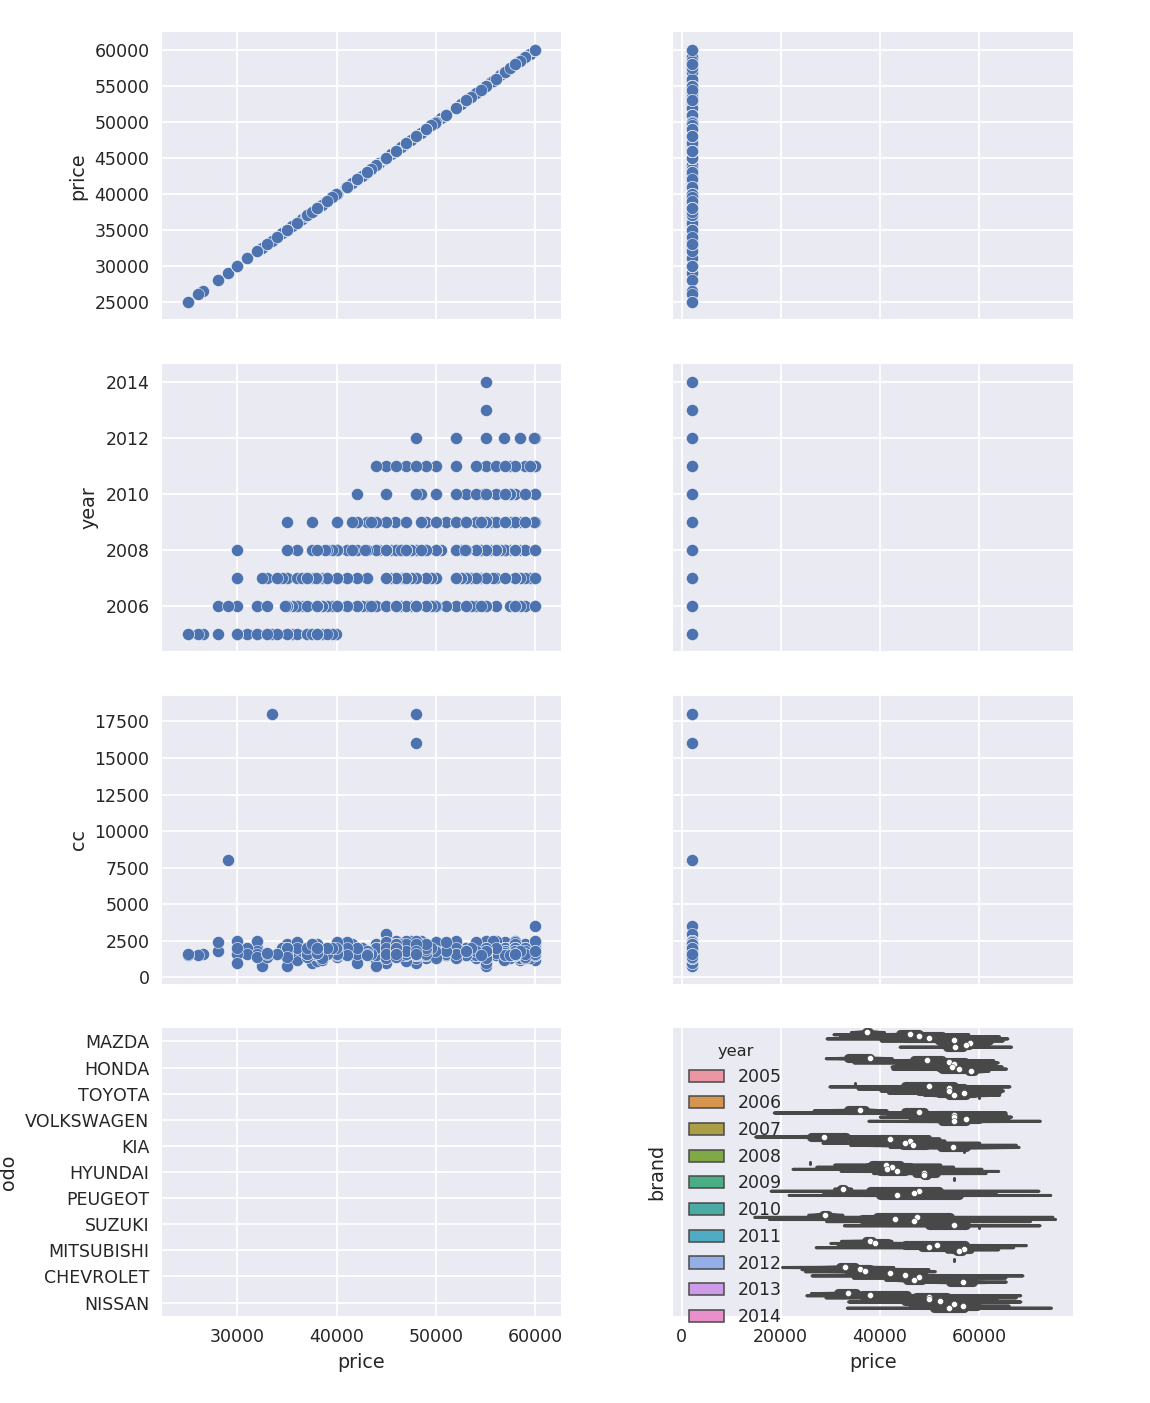

In [28]:
sns.pairplot(filtered_pd_autos, x_vars=["price", "year"], y_vars=["price", "year", "cc", "odo"], dropna=True)